![0](https://user-images.githubusercontent.com/61430438/89726655-70951c00-da3a-11ea-913a-6f6ededf03e7.png)

# GraduateRotational Internship Program
# The-Sparks-Foundation's Task

# Task # 4 - To Explore Decision TreeAlgorithm

### For the given ‘Iris’ dataset,we created the Decision Tree classifier and visualized it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly

# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data
### Let's start to read CSV file of our dateset into a pandas dataframe.

In [5]:
#data=pd.read_csv('https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view?usp=sharing')
data=pd.read_csv('Iris.csv')

In [6]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Exploratory Data Analysis (EDA)

In [7]:
#to check number of rows and columns in dataframe ( [rows,columns] )
data.shape

(150, 6)

In [8]:
#check columns name
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
#Display the data types of each column using the attribute dtype
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [10]:
#check data type of each columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [11]:
#check null values are present in dataset or not
data.isnull().head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


**I use .isnull() function to find null values in data frame
here, True = Null  and False = Not Null
but is is hard to read to dataset which having large entries**

In [14]:
#The describe() function computes a summary of statistics for numeric entries such as count,mean,std,min,etc 
#The column which contain onject dtype then can not be include in it .

data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [15]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [16]:
#find unique species in 'Species' column
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [17]:
#groupby() is used to split data into groups
data.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

**Here, we use previous .isnull() function but here we use sum() function also it add all Null values count and return their sum.**

## Visualizing data using different plots

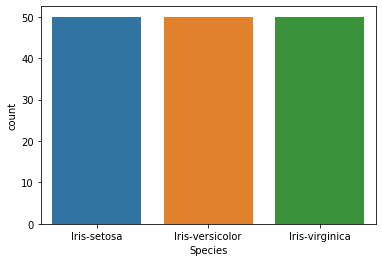

In [18]:
sns.countplot('Species',data=data)
#it show the count of each categprical data

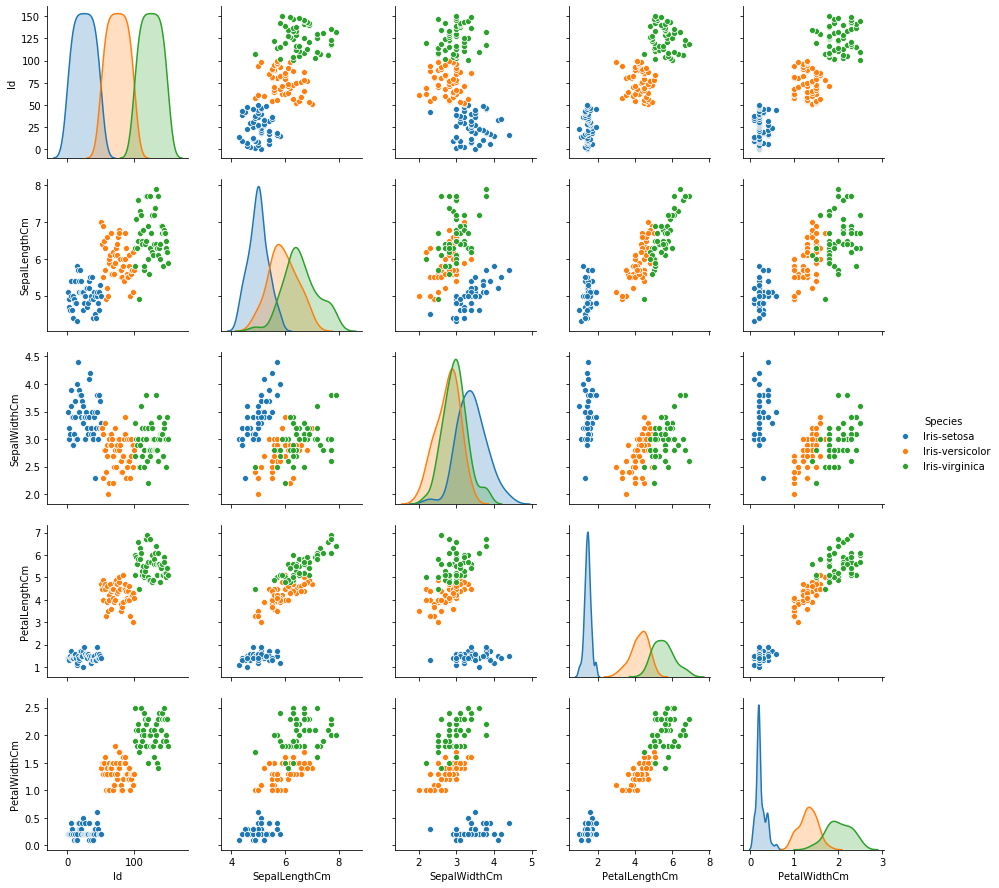

In [19]:
sns.pairplot(data,hue='Species')
#A pairplot plot a pairwise relationships with other columns in datafeamw and also plot pairplot with itself .

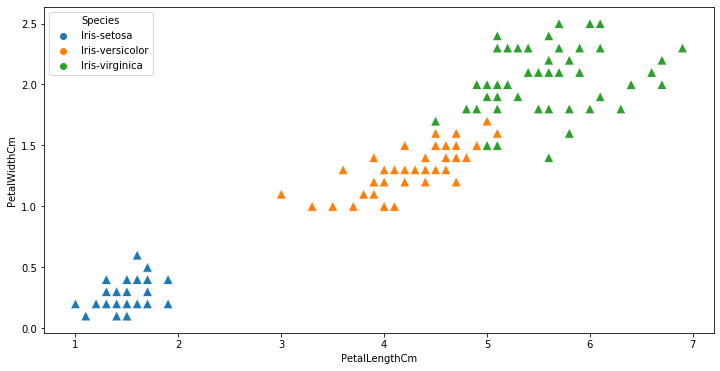

In [20]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=data['PetalLengthCm'],y=data['PetalWidthCm'],hue=data['Species'],marker='^',s = 100)
#it shows
#if petal_length is less that ~2 and petal_width is less than ~0.6 then species ia 'setosa'
#if petal_length is between ~3 and ~5.2 and petal_width is between ~1.0 and ~1.7 then species ia 'versicolor'
#if petal_length is greater that ~5.2 and petal_width is greater than ~1.7 then species ia 'virginica'

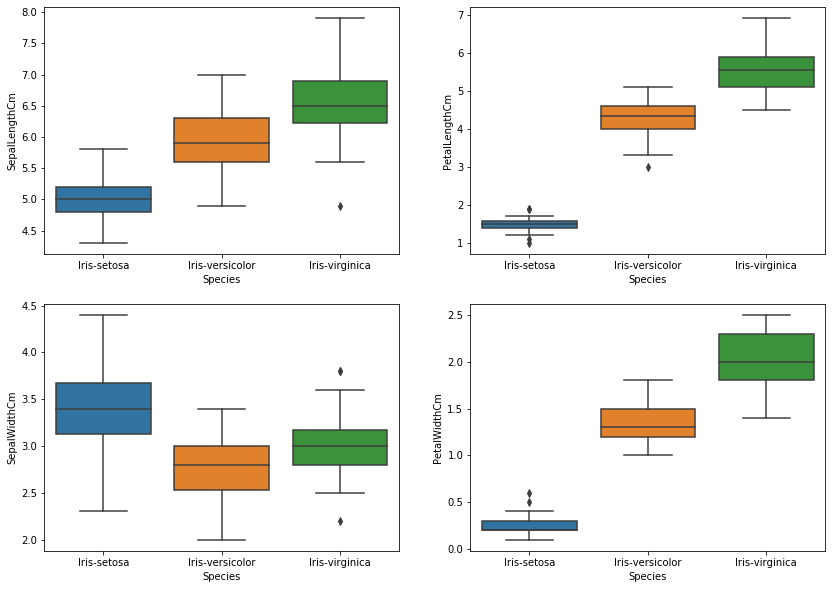

In [21]:
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.boxplot(y=data['SepalLengthCm'],x=data['Species'],data=data)
plt.subplot(2,2,2)
sns.boxplot(y=data['PetalLengthCm'],x=data['Species'],data=data)
plt.subplot(2,2,3)
sns.boxplot(y=data['SepalWidthCm'],x=data['Species'],data=data)
plt.subplot(2,2,4)
sns.boxplot(y=data['PetalWidthCm'],x=data['Species'],data=data)

# Building a Machine Learning Model 

## Train Test Split
**Spliting data for Training and Testing where 'x' training data and 'y' is testing data**

In [24]:
# spliting data for Training and Testing where 'x' training data and 'y' is testing data
x =data.iloc[ : , 1:5].values
y =data['Species']

In [29]:
#import required labrary and model in it
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=3)

#  Decision Tree Algorithm

In [22]:
from sklearn import tree 

In [25]:
cls = tree.DecisionTreeClassifier(random_state=0)
cls = cls.fit(x,y)

[Text(418.5, 498.3, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(354.11538461538464, 407.70000000000005, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(482.8846153846154, 407.70000000000005, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(257.53846153846155, 317.1, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(128.76923076923077, 226.5, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(64.38461538461539, 135.89999999999998, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(193.15384615384616, 135.89999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(386.3076923076923, 226.5, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(321.9230769230769, 135.89999999999998, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(450.69230769230774, 135.89999999999998, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(386.3076923076923, 45.2

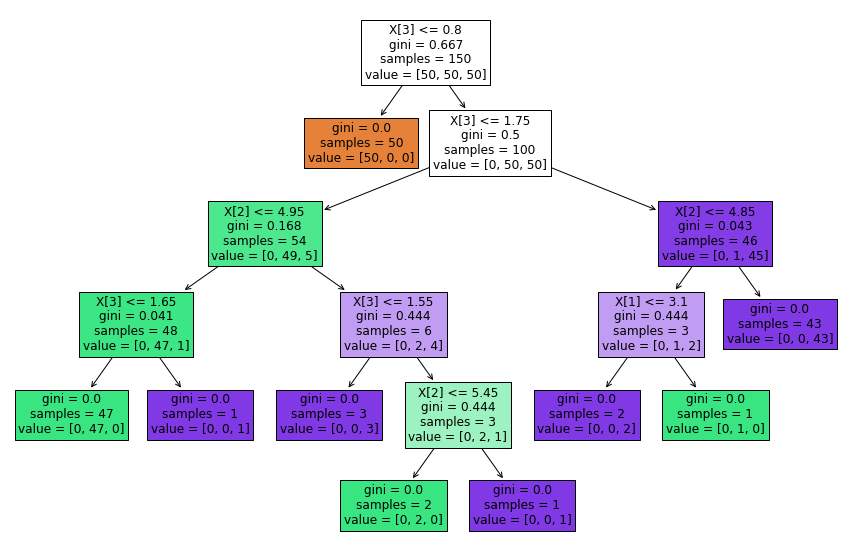

In [26]:
plt.figure(figsize=(15,10))
tree.plot_tree(cls,filled=True)

In [27]:
print(tree.export_text(cls))

|--- feature_3 <= 0.80
|   |--- class: Iris-setosa
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: Iris-virginica
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_2 <= 5.45
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |--- feature_2 >  5.45
|   |   |   |   |   |--- class: Iris-virginica
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: Iris-virginica



## Training and Predicting
**We have split our data into training and testing sets, and now is finally the time to train our algorithm.**

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [37]:
accuracy=[]
for k in range(1,50,2):
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc=metrics.accuracy_score(y_test,y_pred)
    accuracy.append(acc)
print(accuracy)
    
    

[0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333]


49


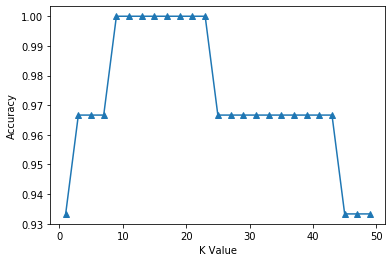

In [38]:
K=[]
for i in range(1,50,2):
    K.append(i)    
plt.plot(K,accuracy,'-^')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
print(k)

In [39]:
model=KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)
y_prd=model.predict(x_test)
acc=metrics.accuracy_score(y_test,y_pred)
print("Accuracy is : {:.3f}".format(acc*100),"%" )

Accuracy is : 93.333 %


In [40]:
x=model.predict([[1.0,1.9,0.6,1.8]])
print("According to data flower specie is :",x)

According to data flower specie is : ['Iris-setosa']


In [41]:
sl=float(input("Enter sepal length : "))
sw=float(input("Enter sepal width : "))
pl=float(input("Enter prtal length : "))
pw=float(input("Enter petal width : "))

x=model.predict([[sl,sw,pl,pw]])
print("According to data flower specie is :",x)

Enter sepal length : 2.5
Enter sepal width : 6.5
Enter prtal length : 8.4
Enter petal width : 6.5
According to data flower specie is : ['Iris-virginica']


# - End